In [ ]:
# # python3 /home/rnb/Projects/rnb-planning/src/pkg/planning/filtering/lattice_model/shared_lattice_predictor.py --rtype panda

# import SharedArray as sa
# ROBOT_TYPE_NAME = 'panda'
# sa.delete("shm://{}.prepared".format(ROBOT_TYPE_NAME))
# sa.delete("shm://{}.grasp_img".format(ROBOT_TYPE_NAME))
# sa.delete("shm://{}.arm_img".format(ROBOT_TYPE_NAME))
# sa.delete("shm://{}.rh_vals".format(ROBOT_TYPE_NAME))
# sa.delete("shm://{}.result".format(ROBOT_TYPE_NAME))
# sa.delete("shm://{}.query_in".format(ROBOT_TYPE_NAME))
# sa.delete("shm://{}.response_out".format(ROBOT_TYPE_NAME))
# sa.delete("shm://{}.query_quit".format(ROBOT_TYPE_NAME))

In [1]:
from __future__ import print_function
import os
import sys
RNB_PLANNING_DIR = os.environ["RNB_PLANNING_DIR"]
sys.path.append(os.path.join(RNB_PLANNING_DIR, 'src'))
from pkg.controller.combined_robot import *
from pkg.utils.utils import get_now, try_mkdir
import subprocess

DATA_PATH = os.path.join(RNB_PLANNING_DIR, "data")
try_mkdir(DATA_PATH)

DAT_ROOT = "stowing-deep"
TEST_DATA_PATH = os.path.join(DATA_PATH, DAT_ROOT)
try_mkdir(TEST_DATA_PATH)

IK_NUMS = [1,2,4,8, 10, 12, 14, 16,32,64]
RESULT_PATHS = []
IK_DIR_FORM = "stowing-deep-result-analysis-ik{:03}"
for ik_num in IK_NUMS:
    RES_ROOT = IK_DIR_FORM.format(ik_num)
    TEST_RESULT_PATH = os.path.join(DATA_PATH, RES_ROOT)
    try_mkdir(TEST_RESULT_PATH)
    RESULT_PATHS.append(RES_ROOT)

HEADS = ["plan_time", "length", "MP_count", "failed_MPs", "IK_count", "failed_IKs", "success"]

def run_test_loop(FILE_OPTION, I_START, I_END, common_args, CNAME_LIST=['None', 'Tool', 'ToolReach', 'Full']):
    N_DAT = I_END-I_START
    ROBOT_DATA_ROOT = os.path.join(TEST_DATA_PATH, RTYPE)
    DATASET_PATH = os.path.join(ROBOT_DATA_ROOT, DAT_DIR)
    file_list = sorted(os.listdir(DATASET_PATH))

    gtimer = GlobalTimer.instance()
    gtimer.reset(scale=1, timeunit='s')

    gtimer.tic("full_loop")
    for fid in range(I_START, I_END):
        e_step_list = []
        for i_c, cname in enumerate(CNAME_LIST):
            gtimer.tic("step")
            p = subprocess.Popen(['python', '{}src/scripts/developing/pddlstream/test_saved_scene.py'.format(RNB_PLANNING_DIR),
                                  '--data_idx', str(fid), '--file_option', FILE_OPTION, '--cname', cname,]
                                 + common_args)
            p.wait()
            e_step = np.round(gtimer.toc("step"), 1)
            e_step_list.append(e_step)
            print("------- " + ("{:<8}"*len(e_step_list)).format(*e_step_list) + "-------", end="\r")

        print("")
        print("========== {} / {} (eta: {} / {} s) =========".format(
            fid+1, N_DAT, *np.round(gtimer.eta("full_loop", fid-I_START+1, N_DAT), 1)))

## Common params

In [2]:
RTYPE = "panda"
DAT_DIR = '20210917-113211'
I_START = 0
I_END = 30


CNAME_LIST = ['None']
# CNAME_LIST = ['Full'] #,'Pairwise']
VISUALIZE = False
PLAY_RESULT = False
SHOW_STATE = False

TIMEOUT_MOTION = 5
MAX_TIME = 100
MAX_ITER = 100

GRASP_SAMPLE = 30
STABLE_SAMPLE = 50
SEARCH_SAMPLE_RATIO= 100
MAX_SKELETONS = 30
TIMED_COMPLETE = False
STACK_TIMELOG = True
IK_TRY_NUM = 30
VERBOSE = False
USE_MOVEIT_IK = True


common_args = [
            '--rtype', RTYPE,
            '--dat_root', DAT_ROOT,
            '--res_root', RES_ROOT,
            '--dat_dir', DAT_DIR,
            '--VISUALIZE', str(VISUALIZE),
            '--PLAY_RESULT', str(PLAY_RESULT),
            '--TIMEOUT_MOTION', str(TIMEOUT_MOTION),
            '--MAX_TIME', str(MAX_TIME),
            '--MAX_ITER', str(MAX_ITER), 
            '--GRASP_SAMPLE', str(GRASP_SAMPLE),
            '--STABLE_SAMPLE', str(STABLE_SAMPLE),
            '--SEARCH_SAMPLE_RATIO', str(SEARCH_SAMPLE_RATIO),
            '--MAX_SKELETONS', str(MAX_SKELETONS),
            '--TIMED_COMPLETE', str(TIMED_COMPLETE),
            '--STACK_TIMELOG', str(STACK_TIMELOG),
            '--IK_TRY_NUM', str(IK_TRY_NUM),
            '--VERBOSE', str(VERBOSE),
            '--USE_MOVEIT_IK', str(USE_MOVEIT_IK)]

# test loop

In [3]:
for ik_num, res_path in zip(IK_NUMS, RESULT_PATHS):
    common_args[common_args.index("--res_root")+1] = res_path
    common_args[common_args.index("--IK_TRY_NUM")+1] = str(ik_num)
    FILE_OPTION = "obj_1c_obs0"
    run_test_loop(FILE_OPTION, I_START, I_END, common_args, CNAME_LIST=CNAME_LIST)

    FILE_OPTION = "obj_1c_obs3"
    run_test_loop(FILE_OPTION, I_START, I_END, common_args, CNAME_LIST=CNAME_LIST)

    FILE_OPTION = "obj_1c_obs5"
    run_test_loop(FILE_OPTION, I_START, I_END, common_args, CNAME_LIST=CNAME_LIST)

    FILE_OPTION = "obj_1c_obs7"
    run_test_loop(FILE_OPTION, I_START, I_END, common_args, CNAME_LIST=CNAME_LIST)

    FILE_OPTION = "obj_3c_obs3"
    run_test_loop(FILE_OPTION, I_START, I_END, common_args, CNAME_LIST=CNAME_LIST)

    FILE_OPTION = "obj_3c_obs5"
    run_test_loop(FILE_OPTION, I_START, I_END, common_args, CNAME_LIST=CNAME_LIST)

    FILE_OPTION = "obj_3c_obs7"
    run_test_loop(FILE_OPTION, I_START, I_END, common_args, CNAME_LIST=CNAME_LIST)

------- 5.8     -------
========== 1 / 30 (eta: 5.8 / 175.3 s) =========
------- 9.3     -------
========== 2 / 30 (eta: 15.1 / 226.6 s) =========
------- 4.6     -------
========== 3 / 30 (eta: 19.7 / 197.4 s) =========
------- 20.2    -------
========== 4 / 30 (eta: 39.9 / 299.4 s) =========
------- 3.5     -------
========== 5 / 30 (eta: 43.5 / 260.7 s) =========
------- 14.5    -------
========== 6 / 30 (eta: 58.0 / 289.9 s) =========
------- 3.4     -------
========== 7 / 30 (eta: 61.4 / 263.1 s) =========
------- 3.5     -------
========== 8 / 30 (eta: 64.9 / 243.5 s) =========
------- 3.3     -------
========== 9 / 30 (eta: 68.2 / 227.4 s) =========
------- 6.9     -------
========== 10 / 30 (eta: 75.1 / 225.4 s) =========
------- 4.0     -------
========== 11 / 30 (eta: 79.2 / 215.9 s) =========
------- 9.3     -------
========== 12 / 30 (eta: 88.5 / 221.2 s) =========
------- 5.2     -------
========== 13 / 30 (eta: 93.7 / 216.3 s) =========
------- 9.2     -------
========== 

------- 10.3    -------
========== 21 / 30 (eta: 168.3 / 240.4 s) =========
------- 10.1    -------
========== 22 / 30 (eta: 178.4 / 243.3 s) =========
------- 4.5     -------
========== 23 / 30 (eta: 182.9 / 238.6 s) =========
------- 3.7     -------
========== 24 / 30 (eta: 186.6 / 233.3 s) =========
------- 6.0     -------
========== 25 / 30 (eta: 192.7 / 231.2 s) =========
------- 18.1    -------
========== 26 / 30 (eta: 210.8 / 243.2 s) =========
------- 3.5     -------
========== 27 / 30 (eta: 214.3 / 238.1 s) =========
------- 4.0     -------
========== 28 / 30 (eta: 218.3 / 233.9 s) =========
------- 15.5    -------
========== 29 / 30 (eta: 233.9 / 241.9 s) =========
------- 4.0     -------
========== 30 / 30 (eta: 237.9 / 237.9 s) =========
------- 41.7    -------
========== 1 / 30 (eta: 41.7 / 1249.6 s) =========
------- 50.0    -------
========== 2 / 30 (eta: 91.7 / 1375.4 s) =========
------- 5.8     -------
========== 3 / 30 (eta: 97.5 / 975.3 s) =========
------- 9.2     

------- 4.9     -------
========== 10 / 30 (eta: 50.9 / 152.6 s) =========
------- 12.4    -------
========== 11 / 30 (eta: 63.3 / 172.6 s) =========
------- 7.6     -------
========== 12 / 30 (eta: 70.9 / 177.2 s) =========
------- 4.1     -------
========== 13 / 30 (eta: 75.0 / 173.0 s) =========
------- 14.9    -------
========== 14 / 30 (eta: 89.9 / 192.6 s) =========
------- 4.3     -------
========== 15 / 30 (eta: 94.2 / 188.4 s) =========
------- 9.4     -------
========== 16 / 30 (eta: 103.6 / 194.3 s) =========
------- 4.6     -------
========== 17 / 30 (eta: 108.2 / 191.0 s) =========
------- 14.8    -------
========== 18 / 30 (eta: 123.0 / 205.1 s) =========
------- 9.6     -------
========== 19 / 30 (eta: 132.6 / 209.4 s) =========
------- 3.5     -------
========== 20 / 30 (eta: 136.2 / 204.3 s) =========
------- 7.1     -------
========== 21 / 30 (eta: 143.3 / 204.7 s) =========
------- 5.0     -------
========== 22 / 30 (eta: 148.3 / 202.2 s) =========
------- 3.4     --

------- 44.2    -------
========== 29 / 30 (eta: 366.0 / 378.6 s) =========
------- 5.9     -------
========== 30 / 30 (eta: 371.9 / 371.9 s) =========
------- 8.1     -------
========== 1 / 30 (eta: 8.1 / 243.4 s) =========
------- 16.9    -------
========== 2 / 30 (eta: 25.0 / 375.7 s) =========
------- 5.5     -------
========== 3 / 30 (eta: 30.6 / 305.6 s) =========
------- 4.2     -------
========== 4 / 30 (eta: 34.8 / 261.0 s) =========
------- 4.1     -------
========== 5 / 30 (eta: 38.9 / 233.6 s) =========
------- 6.4     -------
========== 6 / 30 (eta: 45.4 / 226.8 s) =========
------- 20.7    -------
========== 7 / 30 (eta: 66.1 / 283.3 s) =========
------- 6.3     -------
========== 8 / 30 (eta: 72.4 / 271.6 s) =========
------- 3.7     -------
========== 9 / 30 (eta: 76.1 / 253.8 s) =========
------- 13.9    -------
========== 10 / 30 (eta: 90.1 / 270.2 s) =========
------- 13.9    -------
========== 11 / 30 (eta: 104.0 / 283.7 s) =========
------- 14.3    -------
========

------- 15.1    -------
========== 18 / 30 (eta: 135.1 / 225.1 s) =========
------- 8.7     -------
========== 19 / 30 (eta: 143.8 / 227.0 s) =========
------- 3.4     -------
========== 20 / 30 (eta: 147.2 / 220.8 s) =========
------- 3.4     -------
========== 21 / 30 (eta: 150.6 / 215.1 s) =========
------- 5.1     -------
========== 22 / 30 (eta: 155.7 / 212.4 s) =========
------- 8.6     -------
========== 23 / 30 (eta: 164.3 / 214.4 s) =========
------- 3.5     -------
========== 24 / 30 (eta: 167.9 / 209.8 s) =========
------- 3.4     -------
========== 25 / 30 (eta: 171.3 / 205.5 s) =========
------- 3.4     -------
========== 26 / 30 (eta: 174.7 / 201.6 s) =========
------- 13.6    -------
========== 27 / 30 (eta: 188.3 / 209.3 s) =========
------- 3.4     -------
========== 28 / 30 (eta: 191.7 / 205.4 s) =========
------- 3.7     -------
========== 29 / 30 (eta: 195.5 / 202.2 s) =========
------- 8.9     -------
========== 30 / 30 (eta: 204.4 / 204.4 s) =========
------- 9.4 

------- 10.1    -------
========== 7 / 30 (eta: 93.3 / 399.8 s) =========
------- 3.7     -------
========== 8 / 30 (eta: 97.0 / 363.7 s) =========
------- 5.0     -------
========== 9 / 30 (eta: 102.0 / 340.0 s) =========
------- 11.6    -------
========== 10 / 30 (eta: 113.6 / 340.9 s) =========
------- 20.5    -------
========== 11 / 30 (eta: 134.2 / 365.9 s) =========
------- 4.8     -------
========== 12 / 30 (eta: 139.0 / 347.4 s) =========
------- 13.7    -------
========== 13 / 30 (eta: 152.7 / 352.4 s) =========
------- 10.3    -------
========== 14 / 30 (eta: 163.0 / 349.2 s) =========
------- 4.1     -------
========== 15 / 30 (eta: 167.1 / 334.1 s) =========
------- 10.8    -------
========== 16 / 30 (eta: 177.8 / 333.4 s) =========
------- 4.3     -------
========== 17 / 30 (eta: 182.1 / 321.4 s) =========
------- 29.8    -------
========== 18 / 30 (eta: 212.0 / 353.3 s) =========
------- 4.3     -------
========== 19 / 30 (eta: 216.3 / 341.5 s) =========
------- 6.3     -

------- 3.4     -------
========== 26 / 30 (eta: 196.5 / 226.7 s) =========
------- 9.0     -------
========== 27 / 30 (eta: 205.5 / 228.4 s) =========
------- 3.5     -------
========== 28 / 30 (eta: 209.0 / 224.0 s) =========
------- 6.3     -------
========== 29 / 30 (eta: 215.3 / 222.7 s) =========
------- 13.5    -------
========== 30 / 30 (eta: 228.8 / 228.8 s) =========
------- 8.0     -------
========== 1 / 30 (eta: 8.0 / 239.9 s) =========
------- 10.8    -------
========== 2 / 30 (eta: 18.8 / 281.3 s) =========
------- 9.1     -------
========== 3 / 30 (eta: 27.9 / 278.8 s) =========
------- 14.9    -------
========== 4 / 30 (eta: 42.8 / 321.1 s) =========
------- 9.2     -------
========== 5 / 30 (eta: 52.0 / 312.2 s) =========
------- 3.6     -------
========== 6 / 30 (eta: 55.6 / 278.2 s) =========
------- 10.1    -------
========== 7 / 30 (eta: 65.7 / 281.8 s) =========
------- 34.5    -------
========== 8 / 30 (eta: 100.2 / 375.9 s) =========
------- 4.9     -------
====

------- 12.2    -------
========== 15 / 30 (eta: 233.7 / 467.4 s) =========
------- 5.1     -------
========== 16 / 30 (eta: 238.8 / 447.7 s) =========
------- 3.9     -------
========== 17 / 30 (eta: 242.7 / 428.3 s) =========
------- 105.1   -------
========== 18 / 30 (eta: 347.8 / 579.7 s) =========
------- 7.6     -------
========== 19 / 30 (eta: 355.4 / 561.2 s) =========
------- 10.6    -------
========== 20 / 30 (eta: 366.0 / 549.1 s) =========
------- 18.6    -------
========== 21 / 30 (eta: 384.7 / 549.5 s) =========
------- 6.8     -------
========== 22 / 30 (eta: 391.5 / 533.8 s) =========
------- 12.6    -------
========== 23 / 30 (eta: 404.1 / 527.1 s) =========
------- 4.0     -------
========== 24 / 30 (eta: 408.1 / 510.1 s) =========
------- 48.4    -------
========== 25 / 30 (eta: 456.5 / 547.8 s) =========
------- 7.1     -------
========== 26 / 30 (eta: 463.6 / 534.9 s) =========
------- 4.3     -------
========== 27 / 30 (eta: 467.9 / 519.9 s) =========
------- 9.2 

------- 11.3    -------
========== 4 / 30 (eta: 36.8 / 276.0 s) =========
------- 3.9     -------
========== 5 / 30 (eta: 40.7 / 244.2 s) =========
------- 3.8     -------
========== 6 / 30 (eta: 44.5 / 222.7 s) =========
------- 4.8     -------
========== 7 / 30 (eta: 49.4 / 211.6 s) =========
------- 31.1    -------
========== 8 / 30 (eta: 80.5 / 301.9 s) =========
------- 4.2     -------
========== 9 / 30 (eta: 84.7 / 282.4 s) =========
------- 9.8     -------
========== 10 / 30 (eta: 94.5 / 283.6 s) =========
------- 5.9     -------
========== 11 / 30 (eta: 100.5 / 274.0 s) =========
------- 4.4     -------
========== 12 / 30 (eta: 104.9 / 262.2 s) =========
------- 10.0    -------
========== 13 / 30 (eta: 114.9 / 265.1 s) =========
------- 11.2    -------
========== 14 / 30 (eta: 126.1 / 270.2 s) =========
------- 7.9     -------
========== 15 / 30 (eta: 134.0 / 268.0 s) =========
------- 4.3     -------
========== 16 / 30 (eta: 138.3 / 259.3 s) =========
------- 9.5     -------
=

------- 7.4     -------
========== 23 / 30 (eta: 271.7 / 354.4 s) =========
------- 4.8     -------
========== 24 / 30 (eta: 276.5 / 345.6 s) =========
------- 108.7   -------
========== 25 / 30 (eta: 385.2 / 462.3 s) =========
------- 11.7    -------
========== 26 / 30 (eta: 396.9 / 458.0 s) =========
------- 7.1     -------
========== 27 / 30 (eta: 404.1 / 448.9 s) =========
------- 9.3     -------
========== 28 / 30 (eta: 413.4 / 442.9 s) =========
------- 10.2    -------
========== 29 / 30 (eta: 423.6 / 438.2 s) =========
------- 8.0     -------
========== 30 / 30 (eta: 431.6 / 431.6 s) =========
------- 13.8    -------
========== 1 / 30 (eta: 13.8 / 415.2 s) =========
------- 11.7    -------
========== 2 / 30 (eta: 25.5 / 382.4 s) =========
------- 4.6     -------
========== 3 / 30 (eta: 30.1 / 301.2 s) =========
------- 4.6     -------
========== 4 / 30 (eta: 34.7 / 260.6 s) =========
------- 12.3    -------
========== 5 / 30 (eta: 47.1 / 282.3 s) =========
------- 4.8     ------

------- 4.7     -------
========== 12 / 30 (eta: 95.1 / 237.8 s) =========
------- 10.6    -------
========== 13 / 30 (eta: 105.7 / 244.0 s) =========
------- 21.8    -------
========== 14 / 30 (eta: 127.6 / 273.4 s) =========
------- 4.4     -------
========== 15 / 30 (eta: 132.0 / 263.9 s) =========
------- 4.5     -------
========== 16 / 30 (eta: 136.5 / 255.9 s) =========
------- 4.3     -------
========== 17 / 30 (eta: 140.8 / 248.5 s) =========
------- 4.1     -------
========== 18 / 30 (eta: 144.9 / 241.5 s) =========
------- 4.4     -------
========== 19 / 30 (eta: 149.3 / 235.8 s) =========
------- 9.9     -------
========== 20 / 30 (eta: 159.3 / 238.9 s) =========
------- 4.1     -------
========== 21 / 30 (eta: 163.4 / 233.4 s) =========
------- 6.1     -------
========== 22 / 30 (eta: 169.5 / 231.1 s) =========
------- 4.3     -------
========== 23 / 30 (eta: 173.8 / 226.7 s) =========
------- 5.5     -------
========== 24 / 30 (eta: 179.4 / 224.2 s) =========
------- 3.8  

------- 5.3     -------
========== 1 / 30 (eta: 5.3 / 159.8 s) =========
------- 86.8    -------
========== 2 / 30 (eta: 92.1 / 1381.7 s) =========
------- 7.2     -------
========== 3 / 30 (eta: 99.3 / 993.3 s) =========
------- 13.9    -------
========== 4 / 30 (eta: 113.2 / 849.3 s) =========
------- 14.7    -------
========== 5 / 30 (eta: 128.0 / 767.8 s) =========
------- 4.8     -------
========== 6 / 30 (eta: 132.8 / 663.8 s) =========
------- 14.6    -------
========== 7 / 30 (eta: 147.3 / 631.4 s) =========
------- 3.9     -------
========== 8 / 30 (eta: 151.2 / 567.1 s) =========
------- 4.1     -------
========== 9 / 30 (eta: 155.4 / 517.8 s) =========
------- 7.3     -------
========== 10 / 30 (eta: 162.7 / 488.0 s) =========
------- 10.1    -------
========== 11 / 30 (eta: 172.8 / 471.2 s) =========
------- 13.2    -------
========== 12 / 30 (eta: 186.0 / 465.0 s) =========
------- 14.4    -------
========== 13 / 30 (eta: 200.4 / 462.4 s) =========
------- 14.4    -------


------- 53.4    -------
========== 20 / 30 (eta: 247.2 / 370.7 s) =========
------- 3.7     -------
========== 21 / 30 (eta: 250.9 / 358.4 s) =========
------- 4.5     -------
========== 22 / 30 (eta: 255.4 / 348.2 s) =========
------- 4.6     -------
========== 23 / 30 (eta: 260.0 / 339.1 s) =========
------- 3.9     -------
========== 24 / 30 (eta: 263.9 / 329.9 s) =========
------- 4.1     -------
========== 25 / 30 (eta: 268.0 / 321.6 s) =========
------- 5.8     -------
========== 26 / 30 (eta: 273.8 / 315.9 s) =========
------- 29.6    -------
========== 27 / 30 (eta: 303.4 / 337.1 s) =========
------- 3.7     -------
========== 28 / 30 (eta: 307.1 / 329.0 s) =========
------- 4.3     -------
========== 29 / 30 (eta: 311.4 / 322.1 s) =========
------- 6.0     -------
========== 30 / 30 (eta: 317.4 / 317.4 s) =========
------- 5.0     -------
========== 1 / 30 (eta: 5.0 / 149.8 s) =========
------- 15.5    -------
========== 2 / 30 (eta: 20.5 / 307.9 s) =========
------- 3.9     -

------- 4.6     -------
========== 9 / 30 (eta: 94.2 / 314.0 s) =========
------- 9.9     -------
========== 10 / 30 (eta: 104.1 / 312.3 s) =========
------- 13.9    -------
========== 11 / 30 (eta: 118.0 / 321.9 s) =========
------- 11.1    -------
========== 12 / 30 (eta: 129.2 / 322.9 s) =========
------- 7.4     -------
========== 13 / 30 (eta: 136.5 / 315.1 s) =========
------- 82.0    -------
========== 14 / 30 (eta: 218.5 / 468.3 s) =========
------- 103.8   -------
========== 15 / 30 (eta: 322.3 / 644.7 s) =========
------- 9.2     -------
========== 16 / 30 (eta: 331.6 / 621.7 s) =========
------- 3.9     -------
========== 17 / 30 (eta: 335.5 / 592.0 s) =========
------- 6.0     -------
========== 18 / 30 (eta: 341.5 / 569.1 s) =========
------- 5.1     -------
========== 19 / 30 (eta: 346.6 / 547.3 s) =========
------- 4.6     -------
========== 20 / 30 (eta: 351.2 / 526.8 s) =========
------- 20.6    -------
========== 21 / 30 (eta: 371.8 / 531.2 s) =========
------- 19.1  

------- 9.0     -------
========== 28 / 30 (eta: 227.0 / 243.2 s) =========
------- 4.6     -------
========== 29 / 30 (eta: 231.6 / 239.6 s) =========
------- 4.7     -------
========== 30 / 30 (eta: 236.3 / 236.3 s) =========
------- 5.9     -------
========== 1 / 30 (eta: 5.9 / 177.5 s) =========
------- 9.9     -------
========== 2 / 30 (eta: 15.8 / 237.4 s) =========
------- 3.9     -------
========== 3 / 30 (eta: 19.7 / 197.5 s) =========
------- 106.8   -------
========== 4 / 30 (eta: 126.6 / 949.2 s) =========
------- 4.8     -------
========== 5 / 30 (eta: 131.4 / 788.3 s) =========
------- 103.6   -------
========== 6 / 30 (eta: 235.0 / 1175.0 s) =========
------- 12.5    -------
========== 7 / 30 (eta: 247.5 / 1060.9 s) =========
------- 5.1     -------
========== 8 / 30 (eta: 252.7 / 947.6 s) =========
------- 5.2     -------
========== 9 / 30 (eta: 257.9 / 859.7 s) =========
------- 5.0     -------
========== 10 / 30 (eta: 262.9 / 788.7 s) =========
------- 5.5     -------

------- 10.2    -------
========== 17 / 30 (eta: 362.7 / 640.1 s) =========
------- 7.0     -------
========== 18 / 30 (eta: 369.7 / 616.2 s) =========
------- 5.9     -------
========== 19 / 30 (eta: 375.7 / 593.1 s) =========
------- 4.5     -------
========== 20 / 30 (eta: 380.2 / 570.2 s) =========
------- 15.6    -------
========== 21 / 30 (eta: 395.8 / 565.4 s) =========
------- 4.2     -------
========== 22 / 30 (eta: 400.0 / 545.5 s) =========
------- 6.5     -------
========== 23 / 30 (eta: 406.5 / 530.3 s) =========
------- 16.9    -------
========== 24 / 30 (eta: 423.5 / 529.3 s) =========
------- 6.8     -------
========== 25 / 30 (eta: 430.3 / 516.3 s) =========
------- 5.7     -------
========== 26 / 30 (eta: 435.9 / 503.0 s) =========
------- 33.3    -------
========== 27 / 30 (eta: 469.3 / 521.4 s) =========
------- 3.9     -------
========== 28 / 30 (eta: 473.2 / 507.0 s) =========
------- 4.6     -------
========== 29 / 30 (eta: 477.8 / 494.3 s) =========
------- 103.

------- 95.6    -------
========== 6 / 30 (eta: 238.8 / 1193.9 s) =========
------- 7.7     -------
========== 7 / 30 (eta: 246.5 / 1056.3 s) =========
------- 9.8     -------
========== 8 / 30 (eta: 256.3 / 961.1 s) =========
------- 10.4    -------
========== 9 / 30 (eta: 266.7 / 889.0 s) =========
------- 7.4     -------
========== 10 / 30 (eta: 274.1 / 822.4 s) =========
------- 9.6     -------
========== 11 / 30 (eta: 283.7 / 773.8 s) =========
------- 23.4    -------
========== 12 / 30 (eta: 307.1 / 767.9 s) =========
------- 24.2    -------
========== 13 / 30 (eta: 331.4 / 764.7 s) =========
------- 9.2     -------
========== 14 / 30 (eta: 340.6 / 729.8 s) =========
------- 4.1     -------
========== 15 / 30 (eta: 344.7 / 689.4 s) =========
------- 5.6     -------
========== 16 / 30 (eta: 350.3 / 656.8 s) =========
------- 4.1     -------
========== 17 / 30 (eta: 354.4 / 625.4 s) =========
------- 33.8    -------
========== 18 / 30 (eta: 388.2 / 647.0 s) =========
------- 7.5   

------- 9.5     -------
========== 25 / 30 (eta: 434.5 / 521.4 s) =========
------- 5.6     -------
========== 26 / 30 (eta: 440.1 / 507.8 s) =========
------- 41.9    -------
========== 27 / 30 (eta: 481.9 / 535.5 s) =========
------- 3.9     -------
========== 28 / 30 (eta: 485.8 / 520.5 s) =========
------- 4.7     -------
========== 29 / 30 (eta: 490.6 / 507.5 s) =========
------- 103.7   -------
========== 30 / 30 (eta: 594.3 / 594.3 s) =========
------- 103.8   -------
========== 1 / 30 (eta: 103.8 / 3114.5 s) =========
------- 21.4    -------
========== 2 / 30 (eta: 125.2 / 1878.6 s) =========
------- 4.2     -------
========== 3 / 30 (eta: 129.4 / 1294.5 s) =========
------- 6.9     -------
========== 4 / 30 (eta: 136.4 / 1022.9 s) =========
------- 8.1     -------
========== 5 / 30 (eta: 144.5 / 867.1 s) =========
------- 18.4    -------
========== 6 / 30 (eta: 162.9 / 814.4 s) =========
------- 31.6    -------
========== 7 / 30 (eta: 194.4 / 833.3 s) =========
------- 14.9   

------- 9.6     -------
========== 14 / 30 (eta: 401.5 / 860.3 s) =========
------- 4.4     -------
========== 15 / 30 (eta: 405.9 / 811.7 s) =========
------- 5.6     -------
========== 16 / 30 (eta: 411.5 / 771.6 s) =========
------- 4.6     -------
========== 17 / 30 (eta: 416.1 / 734.3 s) =========
------- 21.9    -------
========== 18 / 30 (eta: 438.0 / 730.1 s) =========
------- 6.9     -------
========== 19 / 30 (eta: 444.9 / 702.5 s) =========
------- 5.0     -------
========== 20 / 30 (eta: 450.0 / 674.9 s) =========
------- 11.8    -------
========== 21 / 30 (eta: 461.8 / 659.7 s) =========
------- 15.2    -------
========== 22 / 30 (eta: 477.0 / 650.4 s) =========
------- 4.9     -------
========== 23 / 30 (eta: 481.9 / 628.5 s) =========
------- 20.1    -------
========== 24 / 30 (eta: 502.0 / 627.5 s) =========
------- 11.2    -------
========== 25 / 30 (eta: 513.2 / 615.8 s) =========
------- 4.7     -------
========== 26 / 30 (eta: 517.9 / 597.6 s) =========
------- 6.4 

------- 4.1     -------
========== 3 / 30 (eta: 135.8 / 1357.7 s) =========
------- 104.3   -------
========== 4 / 30 (eta: 240.1 / 1800.6 s) =========
------- 23.6    -------
========== 5 / 30 (eta: 263.7 / 1582.3 s) =========
------- 8.0     -------
========== 6 / 30 (eta: 271.8 / 1358.8 s) =========
------- 85.2    -------
========== 7 / 30 (eta: 357.0 / 1529.8 s) =========
------- 15.7    -------
========== 8 / 30 (eta: 372.7 / 1397.6 s) =========
------- 14.7    -------
========== 9 / 30 (eta: 387.4 / 1291.4 s) =========
------- 17.1    -------
========== 10 / 30 (eta: 404.5 / 1213.6 s) =========
------- 4.0     -------
========== 11 / 30 (eta: 408.5 / 1114.2 s) =========
------- 104.0   -------
========== 12 / 30 (eta: 512.5 / 1281.4 s) =========
------- 103.7   -------
========== 13 / 30 (eta: 616.2 / 1422.1 s) =========
------- 18.8    -------
========== 14 / 30 (eta: 635.1 / 1360.8 s) =========
------- 32.7    -------
========== 15 / 30 (eta: 667.8 / 1335.6 s) =========
------

## plot results

In [4]:
from plot_scripts import *

In [5]:
try:
    resdat_all_accum = defaultdict(dict)
    CHECKERS = []
    for ik_num in IK_NUMS:
        resdat_all, res_dict_all = print_results(RES_ROOT=IK_DIR_FORM.format(ik_num), 
                                                 RTYPE="panda", 
                                                 DAT_DIR='20210917-113211',
                                                 CNAMES_EXCLUDE=[], read_only=True
                                                )
        cname_cur = "{:03}".format(ik_num)
        CHECKERS.append(cname_cur)
        for key in resdat_all.keys():
            resdat_all_accum[key][cname_cur]=resdat_all[key]["None"]
except Exception as e:
    TextColors.RED.println("ERROR: "+str(e))
    TextColors.RED.println('If you have not run the test script on this computer yet, please run "test loop" section below')

RES_ROOT: stowing-deep-result-analysis-ik001
DAT_DIR: 20210917-113211
CNAME_LIST: ['None', 'Tool', 'ToolReach', 'Full']
RES_ROOT: stowing-deep-result-analysis-ik002
DAT_DIR: 20210917-113211
CNAME_LIST: ['None', 'Tool', 'ToolReach', 'Full']
RES_ROOT: stowing-deep-result-analysis-ik004
DAT_DIR: 20210917-113211
CNAME_LIST: ['None', 'Tool', 'ToolReach', 'Full']
RES_ROOT: stowing-deep-result-analysis-ik008
DAT_DIR: 20210917-113211
CNAME_LIST: ['None', 'Tool', 'ToolReach', 'Full']
RES_ROOT: stowing-deep-result-analysis-ik010
DAT_DIR: 20210917-113211
CNAME_LIST: ['None', 'Tool', 'ToolReach', 'Full']
RES_ROOT: stowing-deep-result-analysis-ik012
DAT_DIR: 20210917-113211
CNAME_LIST: ['None', 'Tool', 'ToolReach', 'Full']
RES_ROOT: stowing-deep-result-analysis-ik014
DAT_DIR: 20210917-113211
CNAME_LIST: ['None', 'Tool', 'ToolReach', 'Full']
RES_ROOT: stowing-deep-result-analysis-ik016
DAT_DIR: 20210917-113211
CNAME_LIST: ['None', 'Tool', 'ToolReach', 'Full']
RES_ROOT: stowing-deep-result-analysis-i

Text(0.5,1,'success ratios tot')

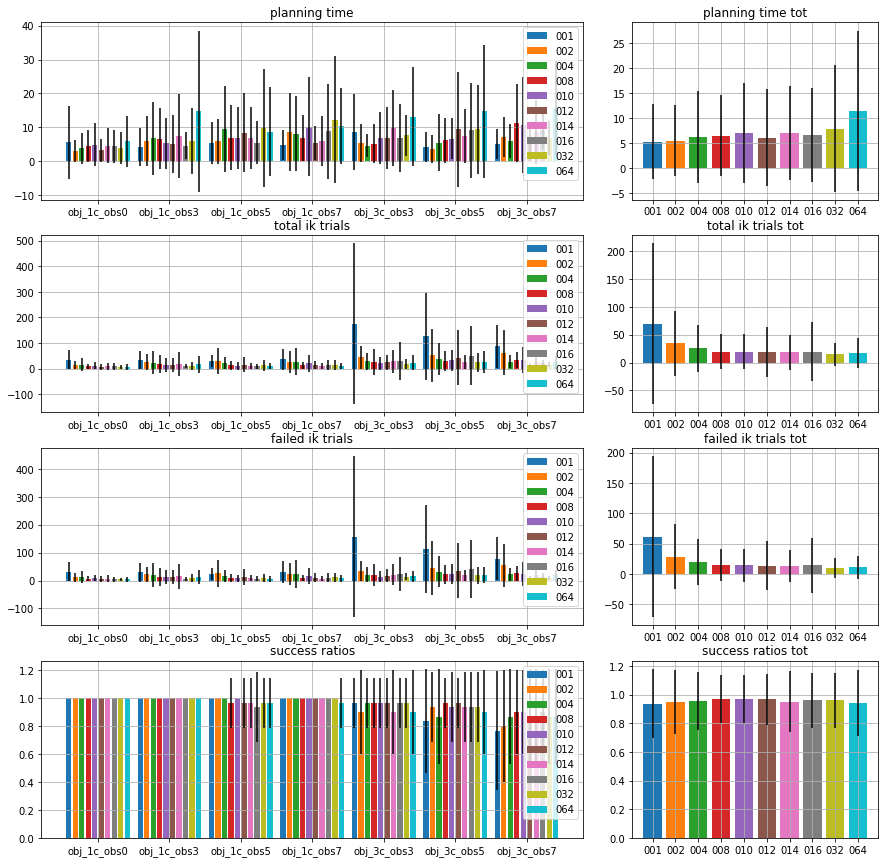

In [6]:
plt.figure(figsize=(15,15))

plt.subplot(4,3,(1, 2))
_ = plot_valid(resdat_all_accum, keys=["plan_time"], CHECKERS=CHECKERS)
plt.title("planning time")
plt.subplot(4,3,3)
time_dict = plot_valid(resdat_all_accum, keys=["plan_time"], CHECKERS=CHECKERS, average_all=True)
plt.title("planning time tot")

plt.subplot(4,3,(4, 5))
_ = plot_valid(resdat_all_accum, keys=["IK_tot"], CHECKERS=CHECKERS)
plt.title("total ik trials")
plt.subplot(4,3,6)
_ = plot_valid(resdat_all_accum, keys=["IK_tot"], CHECKERS=CHECKERS, average_all=True)
plt.title("total ik trials tot")

plt.subplot(4,3,(7, 8))
_ = plot_valid(resdat_all_accum, keys=["failed_IKs"], CHECKERS=CHECKERS)
plt.title("failed ik trials")
plt.subplot(4,3,9)
_ = plot_valid(resdat_all_accum, keys=["failed_IKs"], CHECKERS=CHECKERS, average_all=True)
plt.title("failed ik trials tot")

plt.subplot(4,3,(10, 11))
succ_dict = extract_values(resdat_all_accum, ["success"])
_ = grouped_bar(succ_dict)
plt.title("success ratios")
plt.subplot(4,3,12)
_ = grouped_bar(succ_dict, average_all=True)
plt.title("success ratios tot")

In [7]:
print("="*80)
success_vecs = [np.concatenate(map(lambda x: x["{:03}".format(ik_num)], succ_dict.values())) for ik_num in IK_NUMS]
success_means = map(np.mean, success_vecs)
max_val = np.max(success_means)
max_idc = np.where(success_means==max_val)[0]
print("IK_NUMS: ", "  ".join(map(lambda x:"{:5}".format(x), IK_NUMS)))
print("success: ", "  ".join(map(lambda x:"{:5.03}".format(x), success_means)))
print("best: {} ({:5.3})".format(np.array(IK_NUMS)[max_idc], max_val))
print("-"*80)
time_vecs = [np.concatenate(map(lambda x: x["{:03}".format(ik_num)], time_dict.values())) for ik_num in IK_NUMS]
time_means = np.array(map(np.mean, time_vecs))
min_val = np.min(time_means[max_idc])
min_idc = np.where(time_means[max_idc]==min_val)[0]
print("IK_NUMS: ", "  ".join(map(lambda x:"{:5}".format(x), IK_NUMS)))
print("times  : ", "  ".join(map(lambda x:"{:5.03}".format(x), time_means)))
print("best: {} ({:5.3})".format(np.array(IK_NUMS)[max_idc][min_idc], min_val))
print("="*80)

IK_NUMS:      1      2      4      8     10     12     14     16     32     64
success:  0.938  0.948  0.957  0.971  0.971  0.967  0.952  0.962  0.962  0.943
best: [ 8 10] (0.971)
--------------------------------------------------------------------------------
IK_NUMS:      1      2      4      8     10     12     14     16     32     64
times  :   5.37   5.58   6.32   6.54   7.11   6.13   7.02   6.67   7.96   11.5
best: [8] ( 6.54)


In [8]:
IK_NUM_BEST = np.array(IK_NUMS)[max_idc][min_idc[0]]
print("IK_NUM_BEST: {}".format(IK_NUM_BEST))

IK_NUM_BEST: 8


# MP analysis

In [9]:

IK_TRY_NUM = IK_NUM_BEST
MP_TIMES = [0.1,0.2,0.5,1.0,2.0,3.0,4.0,5.0,8.0]
RESULT_PATHS = []
MP_DIR_FORM = "stowing-deep-result-analysis-ik{:03}_mp{:.3}"
for mp_time in MP_TIMES:
    RES_ROOT = MP_DIR_FORM.format(IK_TRY_NUM, mp_time)
    TEST_RESULT_PATH = os.path.join(DATA_PATH, RES_ROOT)
    try_mkdir(TEST_RESULT_PATH)
    RESULT_PATHS.append(RES_ROOT)

## Common params

In [10]:
RTYPE = "panda"
DAT_DIR = '20210917-113211'
I_START = 0
I_END = 30


CNAME_LIST = ['None']
# CNAME_LIST = ['Full'] #,'Pairwise']
VISUALIZE = False
PLAY_RESULT = False
SHOW_STATE = False

TIMEOUT_MOTION = 5
MAX_TIME = 100
MAX_ITER = 100

GRASP_SAMPLE = 30
STABLE_SAMPLE = 50
SEARCH_SAMPLE_RATIO= 100
MAX_SKELETONS = 30
TIMED_COMPLETE = False
STACK_TIMELOG = True
IK_TRY_NUM = IK_TRY_NUM
VERBOSE = False
USE_MOVEIT_IK = True


common_args = [
            '--rtype', RTYPE,
            '--dat_root', DAT_ROOT,
            '--res_root', RES_ROOT,
            '--dat_dir', DAT_DIR,
            '--VISUALIZE', str(VISUALIZE),
            '--PLAY_RESULT', str(PLAY_RESULT),
            '--TIMEOUT_MOTION', str(TIMEOUT_MOTION),
            '--MAX_TIME', str(MAX_TIME),
            '--MAX_ITER', str(MAX_ITER), 
            '--GRASP_SAMPLE', str(GRASP_SAMPLE),
            '--STABLE_SAMPLE', str(STABLE_SAMPLE),
            '--SEARCH_SAMPLE_RATIO', str(SEARCH_SAMPLE_RATIO),
            '--MAX_SKELETONS', str(MAX_SKELETONS),
            '--TIMED_COMPLETE', str(TIMED_COMPLETE),
            '--STACK_TIMELOG', str(STACK_TIMELOG),
            '--IK_TRY_NUM', str(IK_TRY_NUM),
            '--VERBOSE', str(VERBOSE),
            '--USE_MOVEIT_IK', str(USE_MOVEIT_IK)]

# test loop

In [11]:
for mp_time, res_path in zip(MP_TIMES, RESULT_PATHS):
    common_args[common_args.index("--res_root")+1] = res_path
    common_args[common_args.index("--TIMEOUT_MOTION")+1] = str(mp_time)
    FILE_OPTION = "obj_1c_obs0"
    run_test_loop(FILE_OPTION, I_START, I_END, common_args, CNAME_LIST=CNAME_LIST)

    FILE_OPTION = "obj_1c_obs3"
    run_test_loop(FILE_OPTION, I_START, I_END, common_args, CNAME_LIST=CNAME_LIST)

    FILE_OPTION = "obj_1c_obs5"
    run_test_loop(FILE_OPTION, I_START, I_END, common_args, CNAME_LIST=CNAME_LIST)

    FILE_OPTION = "obj_1c_obs7"
    run_test_loop(FILE_OPTION, I_START, I_END, common_args, CNAME_LIST=CNAME_LIST)

    FILE_OPTION = "obj_3c_obs3"
    run_test_loop(FILE_OPTION, I_START, I_END, common_args, CNAME_LIST=CNAME_LIST)

    FILE_OPTION = "obj_3c_obs5"
    run_test_loop(FILE_OPTION, I_START, I_END, common_args, CNAME_LIST=CNAME_LIST)

    FILE_OPTION = "obj_3c_obs7"
    run_test_loop(FILE_OPTION, I_START, I_END, common_args, CNAME_LIST=CNAME_LIST)

------- 9.9     -------
========== 1 / 30 (eta: 9.9 / 297.6 s) =========
------- 5.0     -------
========== 2 / 30 (eta: 15.0 / 224.3 s) =========
------- 8.9     -------
========== 3 / 30 (eta: 23.9 / 238.8 s) =========
------- 4.4     -------
========== 4 / 30 (eta: 28.2 / 211.8 s) =========
------- 4.1     -------
========== 5 / 30 (eta: 32.4 / 194.1 s) =========
------- 5.3     -------
========== 6 / 30 (eta: 37.7 / 188.3 s) =========
------- 3.8     -------
========== 7 / 30 (eta: 41.5 / 177.8 s) =========
------- 4.0     -------
========== 8 / 30 (eta: 45.5 / 170.7 s) =========
------- 4.2     -------
========== 9 / 30 (eta: 49.7 / 165.8 s) =========
------- 4.4     -------
========== 10 / 30 (eta: 54.1 / 162.3 s) =========
------- 4.5     -------
========== 11 / 30 (eta: 58.6 / 159.9 s) =========
------- 15.5    -------
========== 12 / 30 (eta: 74.2 / 185.4 s) =========
------- 8.2     -------
========== 13 / 30 (eta: 82.4 / 190.1 s) =========
------- 9.9     -------
========== 

------- 7.3     -------
========== 20 / 30 (eta: 471.4 / 707.1 s) =========
------- 16.1    -------
========== 21 / 30 (eta: 487.5 / 696.5 s) =========
------- 104.0   -------
========== 22 / 30 (eta: 591.6 / 806.7 s) =========
------- 14.7    -------
========== 23 / 30 (eta: 606.3 / 790.8 s) =========
------- 4.2     -------
========== 24 / 30 (eta: 610.5 / 763.1 s) =========
------- 7.6     -------
========== 25 / 30 (eta: 618.1 / 741.7 s) =========
------- 103.7   -------
========== 26 / 30 (eta: 721.8 / 832.8 s) =========
------- 5.3     -------
========== 27 / 30 (eta: 727.1 / 807.9 s) =========
------- 21.8    -------
========== 28 / 30 (eta: 749.0 / 802.5 s) =========
------- 104.5   -------
========== 29 / 30 (eta: 853.5 / 882.9 s) =========
------- 103.7   -------
========== 30 / 30 (eta: 957.2 / 957.2 s) =========
------- 46.5    -------
========== 1 / 30 (eta: 46.5 / 1393.7 s) =========
------- 103.7   -------
========== 2 / 30 (eta: 150.1 / 2252.2 s) =========
------- 5.1  

------- 4.2     -------
========== 8 / 30 (eta: 41.7 / 156.3 s) =========
------- 4.5     -------
========== 9 / 30 (eta: 46.2 / 154.1 s) =========
------- 5.1     -------
========== 10 / 30 (eta: 51.4 / 154.1 s) =========
------- 5.5     -------
========== 11 / 30 (eta: 56.8 / 155.0 s) =========
------- 7.8     -------
========== 12 / 30 (eta: 64.7 / 161.7 s) =========
------- 5.9     -------
========== 13 / 30 (eta: 70.6 / 162.9 s) =========
------- 10.6    -------
========== 14 / 30 (eta: 81.2 / 174.0 s) =========
------- 4.1     -------
========== 15 / 30 (eta: 85.3 / 170.6 s) =========
------- 10.8    -------
========== 16 / 30 (eta: 96.1 / 180.3 s) =========
------- 5.3     -------
========== 17 / 30 (eta: 101.5 / 179.1 s) =========
------- 8.0     -------
========== 18 / 30 (eta: 109.5 / 182.6 s) =========
------- 4.5     -------
========== 19 / 30 (eta: 114.1 / 180.1 s) =========
------- 4.2     -------
========== 20 / 30 (eta: 118.3 / 177.4 s) =========
------- 5.3     -------

------- 4.8     -------
========== 27 / 30 (eta: 630.0 / 700.0 s) =========
------- 5.0     -------
========== 28 / 30 (eta: 635.0 / 680.3 s) =========
------- 70.9    -------
========== 29 / 30 (eta: 705.9 / 730.2 s) =========
------- 103.9   -------
========== 30 / 30 (eta: 809.8 / 809.8 s) =========
------- 10.9    -------
========== 1 / 30 (eta: 10.9 / 328.0 s) =========
------- 18.5    -------
========== 2 / 30 (eta: 29.5 / 442.1 s) =========
------- 5.2     -------
========== 3 / 30 (eta: 34.7 / 346.9 s) =========
------- 5.0     -------
========== 4 / 30 (eta: 39.7 / 297.7 s) =========
------- 4.7     -------
========== 5 / 30 (eta: 44.4 / 266.4 s) =========
------- 4.7     -------
========== 6 / 30 (eta: 49.1 / 245.6 s) =========
------- 7.3     -------
========== 7 / 30 (eta: 56.4 / 241.9 s) =========
------- 5.3     -------
========== 8 / 30 (eta: 61.8 / 231.7 s) =========
------- 4.3     -------
========== 9 / 30 (eta: 66.1 / 220.3 s) =========
------- 44.7    -------
======

------- 4.4     -------
========== 16 / 30 (eta: 88.9 / 166.8 s) =========
------- 5.6     -------
========== 17 / 30 (eta: 94.6 / 166.9 s) =========
------- 4.3     -------
========== 18 / 30 (eta: 98.9 / 164.8 s) =========
------- 7.7     -------
========== 19 / 30 (eta: 106.6 / 168.4 s) =========
------- 4.1     -------
========== 20 / 30 (eta: 110.7 / 166.1 s) =========
------- 7.4     -------
========== 21 / 30 (eta: 118.1 / 168.8 s) =========
------- 7.3     -------
========== 22 / 30 (eta: 125.5 / 171.1 s) =========
------- 4.5     -------
========== 23 / 30 (eta: 130.0 / 169.5 s) =========
------- 4.7     -------
========== 24 / 30 (eta: 134.7 / 168.4 s) =========
------- 4.8     -------
========== 25 / 30 (eta: 139.5 / 167.4 s) =========
------- 4.2     -------
========== 26 / 30 (eta: 143.7 / 165.8 s) =========
------- 4.7     -------
========== 27 / 30 (eta: 148.4 / 164.9 s) =========
------- 4.3     -------
========== 28 / 30 (eta: 152.8 / 163.7 s) =========
------- 4.7    

------- 6.4     -------
========== 5 / 30 (eta: 34.9 / 209.7 s) =========
------- 6.1     -------
========== 6 / 30 (eta: 41.1 / 205.4 s) =========
------- 4.6     -------
========== 7 / 30 (eta: 45.7 / 195.8 s) =========
------- 7.0     -------
========== 8 / 30 (eta: 52.7 / 197.6 s) =========
------- 5.2     -------
========== 9 / 30 (eta: 57.9 / 193.1 s) =========
------- 8.7     -------
========== 10 / 30 (eta: 66.7 / 200.0 s) =========
------- 102.5   -------
========== 11 / 30 (eta: 169.2 / 461.4 s) =========
------- 23.4    -------
========== 12 / 30 (eta: 192.6 / 481.5 s) =========
------- 5.9     -------
========== 13 / 30 (eta: 198.5 / 458.1 s) =========
------- 5.4     -------
========== 14 / 30 (eta: 203.9 / 437.0 s) =========
------- 6.8     -------
========== 15 / 30 (eta: 210.8 / 421.5 s) =========
------- 10.5    -------
========== 16 / 30 (eta: 221.3 / 414.9 s) =========
------- 4.7     -------
========== 17 / 30 (eta: 226.0 / 398.9 s) =========
------- 47.7    -------

------- 4.9     -------
========== 24 / 30 (eta: 134.3 / 167.9 s) =========
------- 4.3     -------
========== 25 / 30 (eta: 138.6 / 166.3 s) =========
------- 4.2     -------
========== 26 / 30 (eta: 142.8 / 164.8 s) =========
------- 6.5     -------
========== 27 / 30 (eta: 149.4 / 166.0 s) =========
------- 4.2     -------
========== 28 / 30 (eta: 153.6 / 164.5 s) =========
------- 7.1     -------
========== 29 / 30 (eta: 160.6 / 166.2 s) =========
------- 4.3     -------
========== 30 / 30 (eta: 164.9 / 164.9 s) =========
------- 6.5     -------
========== 1 / 30 (eta: 6.5 / 196.2 s) =========
------- 6.4     -------
========== 2 / 30 (eta: 13.0 / 194.3 s) =========
------- 4.7     -------
========== 3 / 30 (eta: 17.7 / 176.6 s) =========
------- 5.1     -------
========== 4 / 30 (eta: 22.8 / 170.7 s) =========
------- 4.7     -------
========== 5 / 30 (eta: 27.4 / 164.5 s) =========
------- 4.4     -------
========== 6 / 30 (eta: 31.8 / 159.2 s) =========
------- 7.4     -------
=

------- 6.0     -------
========== 13 / 30 (eta: 153.4 / 354.1 s) =========
------- 7.2     -------
========== 14 / 30 (eta: 160.7 / 344.3 s) =========
------- 9.3     -------
========== 15 / 30 (eta: 170.0 / 340.0 s) =========
------- 21.7    -------
========== 16 / 30 (eta: 191.7 / 359.5 s) =========
------- 4.7     -------
========== 17 / 30 (eta: 196.5 / 346.7 s) =========
------- 104.8   -------
========== 18 / 30 (eta: 301.3 / 502.1 s) =========
------- 5.5     -------
========== 19 / 30 (eta: 306.8 / 484.5 s) =========
------- 9.6     -------
========== 20 / 30 (eta: 316.4 / 474.7 s) =========
------- 11.9    -------
========== 21 / 30 (eta: 328.4 / 469.1 s) =========
------- 11.0    -------
========== 22 / 30 (eta: 339.3 / 462.7 s) =========
------- 14.8    -------
========== 23 / 30 (eta: 354.2 / 462.0 s) =========
------- 5.0     -------
========== 24 / 30 (eta: 359.1 / 448.9 s) =========
------- 104.2   -------
========== 25 / 30 (eta: 463.3 / 556.0 s) =========
------- 9.3 

------- 7.8     -------
========== 2 / 30 (eta: 14.9 / 224.2 s) =========
------- 5.0     -------
========== 3 / 30 (eta: 20.0 / 199.9 s) =========
------- 9.3     -------
========== 4 / 30 (eta: 29.3 / 219.8 s) =========
------- 16.3    -------
========== 5 / 30 (eta: 45.7 / 273.9 s) =========
------- 4.5     -------
========== 6 / 30 (eta: 50.2 / 250.8 s) =========
------- 9.3     -------
========== 7 / 30 (eta: 59.5 / 254.9 s) =========
------- 13.5    -------
========== 8 / 30 (eta: 73.0 / 273.7 s) =========
------- 24.2    -------
========== 9 / 30 (eta: 97.1 / 323.8 s) =========
------- 5.2     -------
========== 10 / 30 (eta: 102.4 / 307.1 s) =========
------- 4.4     -------
========== 11 / 30 (eta: 106.8 / 291.2 s) =========
------- 5.4     -------
========== 12 / 30 (eta: 112.2 / 280.5 s) =========
------- 7.5     -------
========== 13 / 30 (eta: 119.7 / 276.3 s) =========
------- 5.3     -------
========== 14 / 30 (eta: 125.0 / 267.9 s) =========
------- 7.6     -------
====

------- 11.9    -------
========== 21 / 30 (eta: 359.2 / 513.1 s) =========
------- 10.3    -------
========== 22 / 30 (eta: 369.5 / 503.9 s) =========
------- 30.2    -------
========== 23 / 30 (eta: 399.7 / 521.3 s) =========
------- 6.0     -------
========== 24 / 30 (eta: 405.6 / 507.0 s) =========
------- 21.6    -------
========== 25 / 30 (eta: 427.2 / 512.6 s) =========
------- 45.3    -------
========== 26 / 30 (eta: 472.4 / 545.1 s) =========
------- 7.6     -------
========== 27 / 30 (eta: 480.1 / 533.4 s) =========
------- 5.9     -------
========== 28 / 30 (eta: 485.9 / 520.6 s) =========
------- 7.0     -------
========== 29 / 30 (eta: 492.9 / 509.9 s) =========
------- 8.7     -------
========== 30 / 30 (eta: 501.6 / 501.6 s) =========
------- 11.1    -------
========== 1 / 30 (eta: 11.1 / 333.5 s) =========
------- 34.1    -------
========== 2 / 30 (eta: 45.2 / 677.5 s) =========
------- 8.2     -------
========== 3 / 30 (eta: 53.4 / 534.0 s) =========
------- 5.5     --

------- 6.1     -------
========== 10 / 30 (eta: 88.8 / 266.4 s) =========
------- 4.6     -------
========== 11 / 30 (eta: 93.4 / 254.8 s) =========
------- 5.4     -------
========== 12 / 30 (eta: 98.9 / 247.1 s) =========
------- 9.0     -------
========== 13 / 30 (eta: 107.9 / 248.9 s) =========
------- 4.7     -------
========== 14 / 30 (eta: 112.6 / 241.3 s) =========
------- 6.3     -------
========== 15 / 30 (eta: 118.9 / 237.8 s) =========
------- 5.5     -------
========== 16 / 30 (eta: 124.4 / 233.3 s) =========
------- 5.5     -------
========== 17 / 30 (eta: 130.0 / 229.4 s) =========
------- 5.8     -------
========== 18 / 30 (eta: 135.8 / 226.3 s) =========
------- 14.1    -------
========== 19 / 30 (eta: 149.9 / 236.7 s) =========
------- 9.2     -------
========== 20 / 30 (eta: 159.2 / 238.7 s) =========
------- 9.6     -------
========== 21 / 30 (eta: 168.8 / 241.1 s) =========
------- 79.7    -------
========== 22 / 30 (eta: 248.5 / 338.8 s) =========
------- 8.2    

------- 5.2     -------
========== 29 / 30 (eta: 405.1 / 419.1 s) =========
------- 11.3    -------
========== 30 / 30 (eta: 416.4 / 416.4 s) =========
------- 9.2     -------
========== 1 / 30 (eta: 9.2 / 274.6 s) =========
------- 6.7     -------
========== 2 / 30 (eta: 15.9 / 238.3 s) =========
------- 5.7     -------
========== 3 / 30 (eta: 21.6 / 216.2 s) =========
------- 5.4     -------
========== 4 / 30 (eta: 27.1 / 202.9 s) =========
------- 29.7    -------
========== 5 / 30 (eta: 56.7 / 340.4 s) =========
------- 8.8     -------
========== 6 / 30 (eta: 65.6 / 327.8 s) =========
------- 5.6     -------
========== 7 / 30 (eta: 71.2 / 305.2 s) =========
------- 9.9     -------
========== 8 / 30 (eta: 81.2 / 304.3 s) =========
------- 5.0     -------
========== 9 / 30 (eta: 86.2 / 287.3 s) =========
------- 5.5     -------
========== 10 / 30 (eta: 91.7 / 275.2 s) =========
------- 14.0    -------
========== 11 / 30 (eta: 105.8 / 288.4 s) =========
------- 114.2   -------
========

------- 5.7     -------
========== 18 / 30 (eta: 179.1 / 298.4 s) =========
------- 5.0     -------
========== 19 / 30 (eta: 184.1 / 290.6 s) =========
------- 22.7    -------
========== 20 / 30 (eta: 206.8 / 310.2 s) =========
------- 5.2     -------
========== 21 / 30 (eta: 212.0 / 302.9 s) =========
------- 6.0     -------
========== 22 / 30 (eta: 218.0 / 297.3 s) =========
------- 5.3     -------
========== 23 / 30 (eta: 223.4 / 291.3 s) =========
------- 9.3     -------
========== 24 / 30 (eta: 232.7 / 290.8 s) =========
------- 4.7     -------
========== 25 / 30 (eta: 237.4 / 284.8 s) =========
------- 8.9     -------
========== 26 / 30 (eta: 246.3 / 284.2 s) =========
------- 24.7    -------
========== 27 / 30 (eta: 271.0 / 301.1 s) =========
------- 7.4     -------
========== 28 / 30 (eta: 278.5 / 298.3 s) =========
------- 4.7     -------
========== 29 / 30 (eta: 283.2 / 292.9 s) =========
------- 6.5     -------
========== 30 / 30 (eta: 289.7 / 289.7 s) =========
------- 6.6 

------- 9.3     -------
========== 7 / 30 (eta: 74.6 / 319.6 s) =========
------- 15.3    -------
========== 8 / 30 (eta: 89.9 / 337.2 s) =========
------- 7.3     -------
========== 9 / 30 (eta: 97.2 / 324.1 s) =========
------- 8.3     -------
========== 10 / 30 (eta: 105.6 / 316.7 s) =========
------- 10.6    -------
========== 11 / 30 (eta: 116.2 / 316.9 s) =========
------- 52.1    -------
========== 12 / 30 (eta: 168.3 / 420.6 s) =========
------- 10.2    -------
========== 13 / 30 (eta: 178.5 / 411.8 s) =========
------- 9.3     -------
========== 14 / 30 (eta: 187.8 / 402.4 s) =========
------- 5.7     -------
========== 15 / 30 (eta: 193.5 / 387.1 s) =========
------- 10.2    -------
========== 16 / 30 (eta: 203.8 / 382.1 s) =========
------- 4.8     -------
========== 17 / 30 (eta: 208.6 / 368.1 s) =========
------- 5.5     -------
========== 18 / 30 (eta: 214.1 / 356.9 s) =========
------- 6.4     -------
========== 19 / 30 (eta: 220.6 / 348.3 s) =========
------- 5.0     --

------- 4.7     -------
========== 26 / 30 (eta: 254.6 / 293.7 s) =========
------- 43.3    -------
========== 27 / 30 (eta: 297.9 / 331.0 s) =========
------- 7.3     -------
========== 28 / 30 (eta: 305.2 / 327.0 s) =========
------- 4.9     -------
========== 29 / 30 (eta: 310.2 / 320.9 s) =========
------- 4.8     -------
========== 30 / 30 (eta: 315.0 / 315.0 s) =========
------- 7.9     -------
========== 1 / 30 (eta: 7.9 / 238.1 s) =========
------- 23.0    -------
========== 2 / 30 (eta: 31.0 / 464.5 s) =========
------- 4.8     -------
========== 3 / 30 (eta: 35.8 / 358.1 s) =========
------- 106.1   -------
========== 4 / 30 (eta: 141.9 / 1064.4 s) =========
------- 5.9     -------
========== 5 / 30 (eta: 147.8 / 886.7 s) =========
------- 109.1   -------
========== 6 / 30 (eta: 256.9 / 1284.4 s) =========
------- 6.3     -------
========== 7 / 30 (eta: 263.2 / 1128.0 s) =========
------- 9.4     -------
========== 8 / 30 (eta: 272.6 / 1022.4 s) =========
------- 6.1     ----

------- 6.6     -------
========== 15 / 30 (eta: 144.4 / 288.8 s) =========
------- 18.0    -------
========== 16 / 30 (eta: 162.4 / 304.6 s) =========
------- 10.4    -------
========== 17 / 30 (eta: 172.9 / 305.1 s) =========
------- 6.8     -------
========== 18 / 30 (eta: 179.7 / 299.5 s) =========
------- 6.6     -------
========== 19 / 30 (eta: 186.3 / 294.2 s) =========
------- 5.0     -------
========== 20 / 30 (eta: 191.3 / 287.0 s) =========
------- 15.3    -------
========== 21 / 30 (eta: 206.7 / 295.3 s) =========
------- 4.9     -------
========== 22 / 30 (eta: 211.6 / 288.6 s) =========
------- 6.0     -------
========== 23 / 30 (eta: 217.6 / 283.9 s) =========
------- 9.8     -------
========== 24 / 30 (eta: 227.4 / 284.3 s) =========
------- 7.5     -------
========== 25 / 30 (eta: 235.0 / 282.0 s) =========
------- 6.5     -------
========== 26 / 30 (eta: 241.5 / 278.7 s) =========
------- 27.1    -------
========== 27 / 30 (eta: 268.6 / 298.4 s) =========
------- 9.7 

------- 11.4    -------
========== 4 / 30 (eta: 28.4 / 212.8 s) =========
------- 6.7     -------
========== 5 / 30 (eta: 35.1 / 210.5 s) =========
------- 95.6    -------
========== 6 / 30 (eta: 130.7 / 653.4 s) =========
------- 9.1     -------
========== 7 / 30 (eta: 139.8 / 599.2 s) =========
------- 7.6     -------
========== 8 / 30 (eta: 147.4 / 552.9 s) =========
------- 13.6    -------
========== 9 / 30 (eta: 161.0 / 536.6 s) =========
------- 50.8    -------
========== 10 / 30 (eta: 211.8 / 635.3 s) =========
------- 13.0    -------
========== 11 / 30 (eta: 224.8 / 613.1 s) =========
------- 20.0    -------
========== 12 / 30 (eta: 244.8 / 612.1 s) =========
------- 8.8     -------
========== 13 / 30 (eta: 253.7 / 585.3 s) =========
------- 13.4    -------
========== 14 / 30 (eta: 267.1 / 572.3 s) =========
------- 13.4    -------
========== 15 / 30 (eta: 280.5 / 561.0 s) =========
------- 5.8     -------
========== 16 / 30 (eta: 286.3 / 536.8 s) =========
------- 4.8     ----

------- 5.9     -------
========== 23 / 30 (eta: 361.7 / 471.8 s) =========
------- 11.6    -------
========== 24 / 30 (eta: 373.3 / 466.6 s) =========
------- 20.6    -------
========== 25 / 30 (eta: 393.9 / 472.6 s) =========
------- 16.7    -------
========== 26 / 30 (eta: 410.6 / 473.8 s) =========
------- 24.7    -------
========== 27 / 30 (eta: 435.2 / 483.6 s) =========
------- 4.8     -------
========== 28 / 30 (eta: 440.1 / 471.5 s) =========
------- 5.2     -------
========== 29 / 30 (eta: 445.3 / 460.7 s) =========
------- 41.7    -------
========== 30 / 30 (eta: 487.1 / 487.1 s) =========
------- 104.8   -------
========== 1 / 30 (eta: 104.8 / 3142.7 s) =========
------- 30.7    -------
========== 2 / 30 (eta: 135.5 / 2032.6 s) =========
------- 5.0     -------
========== 3 / 30 (eta: 140.5 / 1405.2 s) =========
------- 9.0     -------
========== 4 / 30 (eta: 149.5 / 1121.6 s) =========
------- 6.5     -------
========== 5 / 30 (eta: 156.1 / 936.4 s) =========
------- 13.0 

## plot results

In [12]:
from plot_scripts import *

In [13]:
try:
    resdat_all_accum = defaultdict(dict)
    CHECKERS = []
    for mp_time in MP_TIMES:
        resdat_all, res_dict_all = print_results(RES_ROOT=
                                                 MP_DIR_FORM.format(IK_TRY_NUM, mp_time), 
                                                 RTYPE="panda", 
                                                 DAT_DIR='20210917-113211',
                                                 CNAMES_EXCLUDE=[], read_only=False
                                                )
        cname_cur = "{:03}".format(mp_time)
        CHECKERS.append(cname_cur)
        for key in resdat_all.keys():
            resdat_all_accum[key][cname_cur]=resdat_all[key]["None"]
except Exception as e:
    TextColors.RED.println("ERROR: "+str(e))
    TextColors.RED.println('If you have not run the test script on this computer yet, please run "test loop" section below')

RES_ROOT: stowing-deep-result-analysis-ik008_mp0.1
DAT_DIR: 20210917-113211
CNAME_LIST: ['None', 'Tool', 'ToolReach', 'Full']
obj_1
obj_1_obs3
obj_1_obs5
obj_3
obj_3_pole
obj_3_hard
obj_1c_obs0
None files: 30
================================================== obj_1c_obs0 ================================================== valid=30
Checker   :     Time  Actions   MP_tot       MP trials        MP fails   IK_tot       IK trials        IK fails  Fail(%)    Total
None      :     3.19     5.13      7.4      7.4(100.0)     3.63( 35.8)    56.83    56.83(100.0)    47.77(58.32)      0.0       30
obj_1c_obs3
None files: 30
================================================== obj_1c_obs3 ================================================== valid=28
Checker   :     Time  Actions   MP_tot       MP trials        MP fails   IK_tot       IK trials        IK fails  Fail(%)    Total
None      :     3.83      5.0     9.32     9.32(100.0)     5.18(30.72)    73.54    73.54(100.0)    62.46(61.18)     6.67       3

obj_1
obj_1_obs3
obj_1_obs5
obj_3
obj_3_pole
obj_3_hard
obj_1c_obs0
None files: 30
================================================== obj_1c_obs0 ================================================== valid=30
Checker   :     Time  Actions   MP_tot       MP trials        MP fails   IK_tot       IK trials        IK fails  Fail(%)    Total
None      :     1.57      5.0      3.8      3.8(100.0)     0.63(12.01)      9.9      9.9(100.0)     6.43(43.74)      0.0       30
obj_1c_obs3
None files: 30
================================================== obj_1c_obs3 ================================================== valid=30
Checker   :     Time  Actions   MP_tot       MP trials        MP fails   IK_tot       IK trials        IK fails  Fail(%)    Total
None      :     4.38     5.13      5.6      5.6(100.0)     2.23(22.77)     32.3     32.3(100.0)    25.67(60.92)      0.0       30
obj_1c_obs5
None files: 30
================================================== obj_1c_obs5 ==================================

obj_1
obj_1_obs3
obj_1_obs5
obj_3
obj_3_pole
obj_3_hard
obj_1c_obs0
None files: 30
================================================== obj_1c_obs0 ================================================== valid=30
Checker   :     Time  Actions   MP_tot       MP trials        MP fails   IK_tot       IK trials        IK fails  Fail(%)    Total
None      :     3.18     5.13      3.7      3.7(100.0)     0.47( 6.67)     8.23     8.23(100.0)     4.93(44.36)      0.0       30
obj_1c_obs3
None files: 30
================================================== obj_1c_obs3 ================================================== valid=30
Checker   :     Time  Actions   MP_tot       MP trials        MP fails   IK_tot       IK trials        IK fails  Fail(%)    Total
None      :     5.52      5.0     4.27     4.27(100.0)      0.8(11.07)    18.33    18.33(100.0)    14.23(56.73)      0.0       30
obj_1c_obs5
None files: 30
================================================== obj_1c_obs5 ==================================

Text(0.5,1,'success ratios tot')

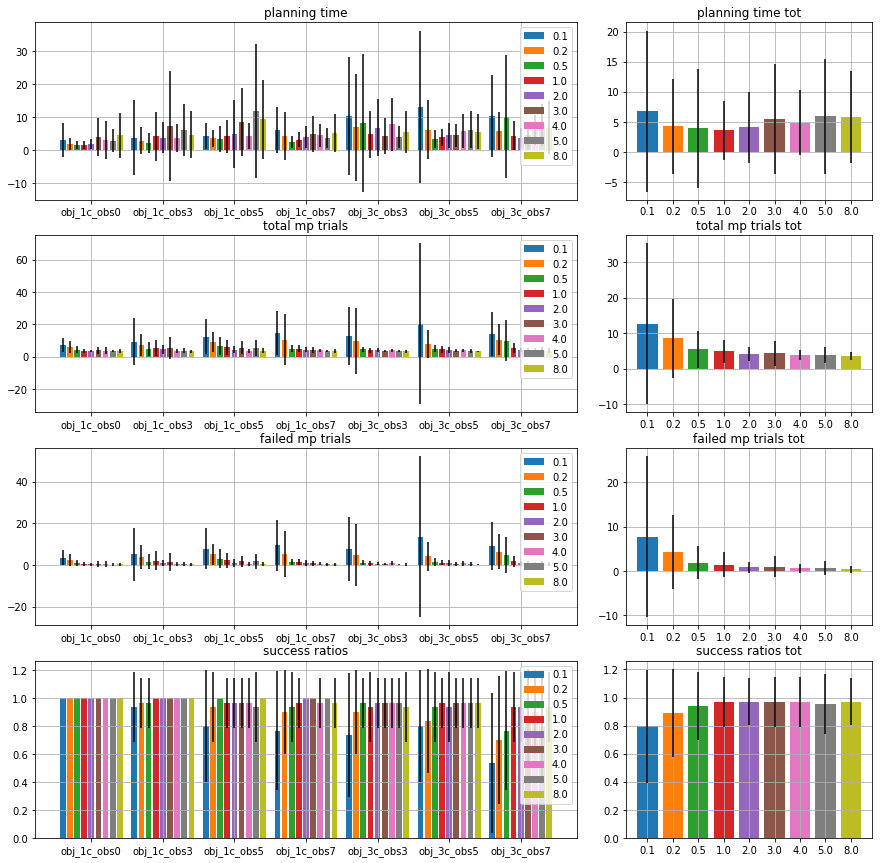

In [14]:
plt.figure(figsize=(15,15))

plt.subplot(4,3,(1, 2))
_ = plot_valid(resdat_all_accum, keys=["plan_time"], CHECKERS=CHECKERS)
plt.title("planning time")
plt.subplot(4,3,3)
time_dict = plot_valid(resdat_all_accum, keys=["plan_time"], CHECKERS=CHECKERS, average_all=True)
plt.title("planning time tot")

plt.subplot(4,3,(4, 5))
_ = plot_valid(resdat_all_accum, keys=["MP_tot"], CHECKERS=CHECKERS)
plt.title("total mp trials")
plt.subplot(4,3,6)
_ = plot_valid(resdat_all_accum, keys=["MP_tot"], CHECKERS=CHECKERS, average_all=True)
plt.title("total mp trials tot")

plt.subplot(4,3,(7, 8))
_ = plot_valid(resdat_all_accum, keys=["failed_MPs"], CHECKERS=CHECKERS)
plt.title("failed mp trials")
plt.subplot(4,3,9)
_ = plot_valid(resdat_all_accum, keys=["failed_MPs"], CHECKERS=CHECKERS, average_all=True)
plt.title("failed mp trials tot")

plt.subplot(4,3,(10, 11))
succ_dict = extract_values(resdat_all_accum, ["success"])
_ = grouped_bar(succ_dict)
plt.title("success ratios")
plt.subplot(4,3,12)
_ = grouped_bar(succ_dict, average_all=True)
plt.title("success ratios tot")

In [15]:
print("="*80)
success_vecs = [np.concatenate(map(lambda x: x["{:03}".format(mp_num)], succ_dict.values())) for mp_num in MP_TIMES]
success_means = map(np.mean, success_vecs)
max_val = np.max(success_means)
max_idc = np.where(success_means==max_val)[0]
print("MP_TIMES: ", "  ".join(map(lambda x:"{:5}".format(x), MP_TIMES)))
print("success: ", "  ".join(map(lambda x:"{:5.03}".format(x), success_means)))
print("best: {} ({:5.3})".format(np.array(MP_TIMES)[max_idc], max_val))
print("-"*80)
time_vecs = [np.concatenate(map(lambda x: x["{:03}".format(mp_num)], time_dict.values())) for mp_num in MP_TIMES]
time_means = np.array(map(np.mean, time_vecs))
min_val = np.min(time_means[max_idc])
min_idc = np.where(time_means[max_idc]==min_val)[0]
print("MP_TIMES: ", "  ".join(map(lambda x:"{:5}".format(x), MP_TIMES)))
print("times  : ", "  ".join(map(lambda x:"{:5.03}".format(x), time_means)))
print("best: {} ({:5.3})".format(np.array(MP_TIMES)[max_idc][min_idc], min_val))
print("="*80)

MP_TIMES:    0.1    0.2    0.5    1.0    2.0    3.0    4.0    5.0    8.0
success:  0.795   0.89  0.938  0.967  0.971  0.967  0.967  0.952  0.971
best: [2. 8.] (0.971)
--------------------------------------------------------------------------------
MP_TIMES:    0.1    0.2    0.5    1.0    2.0    3.0    4.0    5.0    8.0
times  :   6.78   4.25   3.94   3.61    4.1   5.51   4.83    5.9   5.82
best: [2.] (  4.1)
